# Анализ данных о продажах компьютерных игр для интернет-магазина «Стримчик».

**Описание проекта:** Интернет-магазин «Стримчик», продающий игры по всему миру, стремится выявить закономерности, определяющие успешность игр. Это позволит сделать ставку на потенциально популярные продукты и эффективно планировать рекламные кампании. В рамках проекта мы анализируем исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы, чтобы определить ключевые факторы успеха.

**Цель исследования:** Выявление закономерностей, определяющих успешность компьютерных игр, для планирования рекламных кампаний и стратегий продаж на 2017 год на основе данных до 2016 года.

**Ход исследования:**

- **Подготовка данных:** Загрузка и изучение общей информации из предоставленного датасета.
- **Предобработка данных:** Обработка пропущенных значений, корректировка типов данных, устранение дубликатов и других аномалий.
- **Исследовательский анализ данных:** Изучение основных параметров игр, их распределения, зависимости продаж от различных характеристик, таких как платформа, жанр и возрастной рейтинг ESRB.
- **Составление портрета пользователя каждого региона:** Анализ предпочтений пользователей в разных регионах для более точного таргетирования рекламных кампаний.
- **Проверка гипотез:** 
  - Сравнение средних пользовательских рейтингов платформ Xbox One и PC.
  - Сравнение средних пользовательских рейтингов жанров Action и Sports.

**Общий вывод:** Резюмирование полученных результатов, формулировка ключевых выводов и рекомендаций для планирования рекламных кампаний и стратегий продаж на 2017 год.

С помощью данного исследования мы стремимся предоставить всесторонний анализ данных о продажах компьютерных игр, что станет основой для принятия обоснованных решений и улучшения бизнес-показателей интернет-магазина «Стримчик».

## Шаг 1. Откроем файл с данными и изучим общую информацию

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats as st
import seaborn as sb

In [2]:
games_data = pd.read_csv('/datasets/games.csv')

In [3]:
games_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Есть некоторые пропущенные данные в столбцах "Year_of_Release", "Critic_Score", "User_Score" и "Rating". Также стоит отметить, что оценки пользователей представлены в строковом формате, что может потребовать преобразования для дальнейшего анализа.

In [4]:
games_data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Сохраним размерность датасета до фильтрации

In [5]:
data_shape = games_data.shape
print("Изначальная размерность", data_shape)

Изначальная размерность (16715, 11)


## Шаг 2. Подготовим данные

### Заменим названия столбцов (приведем к нижнему регистру);

In [6]:
games_data.columns = games_data.columns.str.lower()
games_data.head(15)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


### Преобразуем данные в нужные типы.

Столбец "year_of_release" приведем к целочисленному типу, т.к. год не имеет смысла в виде дробного числа:

In [7]:
#games_data['year_of_release'] = games_data['year_of_release'].astype('Int64')
games_data = games_data.dropna(subset=['year_of_release'])
games_data['year_of_release'] = games_data['year_of_release'].astype('int32')
games_data['year_of_release'].dtype

dtype('int32')

Приведем столбец "user_score" к типу float. Но прежде, посмотрим уникальные значения:

In [8]:
games_data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В столбце, помимо числовых значений, присутсвуют "nan" - для пропущенных значений, а так же "tbd", что скорей всего обозначает "to be determined" — то есть оценку еще не определили. Чтобы у нас не возникло проблем с преобразованием, воспользуемся методом "to_numeric", с параметром ошибок "coerce". Так мы автоматически преобразуем все нечисловые значения в NaN.

In [9]:
games_data['user_score'] = pd.to_numeric(games_data['user_score'].replace('tbd', None), errors='coerce')
games_data['user_score'].dtype

dtype('float64')

### Обработаем пропуски:

In [10]:
games_data.isnull().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score         7836
rating             6678
dtype: int64

<b>Визуализируем:

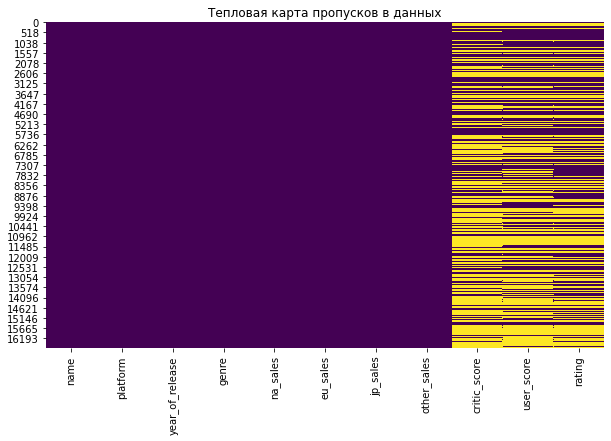

In [11]:
plt.figure(figsize=(10, 6))
sb.heatmap(games_data.isnull(), cbar=False, cmap="viridis")
plt.title("Тепловая карта пропусков в данных")
plt.show()

Удалим пропуски в столбцах, в которых невозможно восполнить значения логически. А именно в: "name", "year_of_release", "genre"

In [12]:
games_data = games_data.dropna(subset = ['name']).reset_index(drop=True)
games_data = games_data.dropna(subset = ['year_of_release']).reset_index(drop=True)
games_data = games_data.dropna(subset = ['genre']).reset_index(drop=True)
games_data[['name', 'year_of_release', 'genre']].isnull().sum()

name               0
year_of_release    0
genre              0
dtype: int64

Причин для пропусков в столбцах "critic_score", "user_score" и "rating" может быть несколько.
- Менее известные, низкобюджетные игры  могут не получать достаточного внимания со стороны критиков и игроков. 
- Релиз исключительно в определенных регионах, где меньшее количество критиков, особенно в случае нишевых продуктов или игр, предназначенных для специфической аудитории. 
- Год релиза. Возможно, рецензенты не брались возвращаться к оценке старых игр, поэтому они и числятся без оценок и рейтинга.
- Релиз на непопулярных платформах.
- Технические причины.

Предлагаю пока оставить пропуски.

### Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

In [13]:
#games_data['total_sales'] = games_data['na_sales'] + games_data['eu_sales'] + games_data['jp_sales'] + games_data['other_sales']
games_data['total_sales'] = games_data[['na_sales', 'eu_sales', 'jp_sales']].sum(axis=1)
games_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,74.09
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,39.47
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,32.23
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,29.82
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,30.38


<b>Промежуточный итог:</b>
- Заменили названия столбцов для последующего удобства.
- Изменили типы в столбцах "year_of_release" и "user_score" на целочисленный и вещественное число соответственно.
- Разобрались с пропусками.
- Добавили новый столбец с суммарными продажами.

## Шаг 3. Проведем исследовательский анализ данных

### Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

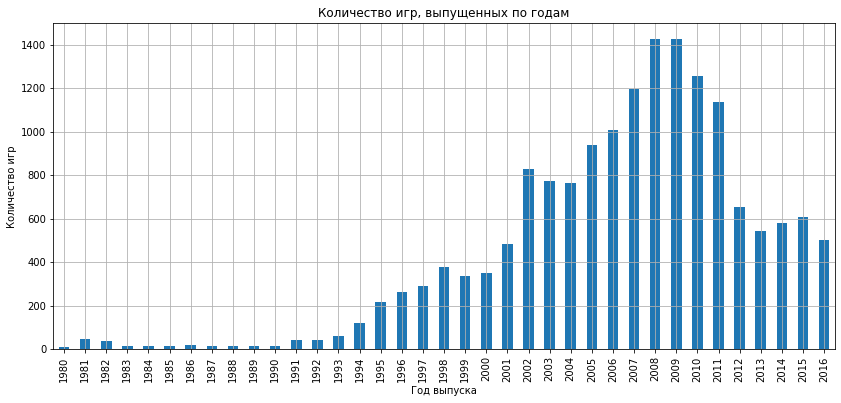

In [14]:
# Кол-во выпущенных игр по годам
games_per_year =  games_data['year_of_release'].value_counts().sort_index()

# Визуализируем, для наглядности
games_per_year.plot(
    kind = 'bar',
    title = 'Количество игр, выпущенных по годам',
    grid = True,
    xlabel = 'Год выпуска',
    ylabel = 'Количество игр',
    figsize = (14, 6)
)
plt.show()

<p>Видно, что количество игр начало стремительно расти с середины 90-х годов, достигнув пика в конце 2000-х на отметке около 1400 игр, а затем начало снижаться.</p>

<p>В период с 2013 по 2016 годы количество выпущенных игр находится на высоком уровне, несмотря на небольшое снижение к концу этого периода. Этот период отражает текущие тренды и может быть наиболее полезен для анализа.
Таким образом, наиболее актуальным периодом для анализа я бы предложил выбрать период с 2013 по 2016 годы. Это позволит нам сосредоточиться на современных тенденциях в игровой индустрии и получить более точные прогнозы на 2017 год.</p>

### Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

Сгруппируем данные по платформам и посчитаем суммарные продажи для каждой:

In [15]:
platform_sales = games_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
platform_sales

platform
PS2     1043.09
X360     876.36
Wii      813.47
PS3      796.75
DS       743.74
PS       686.89
GBA      305.27
PS4      265.79
PSP      248.77
GB       246.27
NES      245.74
3DS      244.54
XB       243.09
PC       233.88
N64      213.70
SNES     196.82
GC       191.60
XOne     145.05
2600      85.64
WiiU      76.24
PSV       47.38
SAT       33.52
GEN       27.46
DC        15.68
SCD        1.81
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

Отберем платформы с наибольшими суммарными продажами. Пусть это будет топ 18:

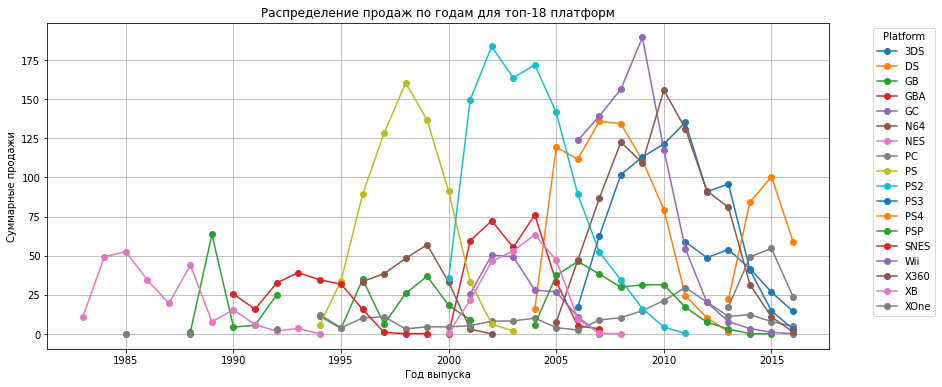

In [16]:
# Топ 18 платформ
top_platform_sales = platform_sales.head(18).index

# Теперь построим распределение продаж по годам для этих платформ
platform_yearly_sales = games_data[games_data['platform'].isin(top_platform_sales)].pivot_table(
    index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

# Визуализируем
platform_yearly_sales.plot(
    kind = 'line',
    figsize = (14, 6),
    marker = 'o',
    title = 'Распределение продаж по годам для топ-18 платформ',
    xlabel = 'Год выпуска',
    ylabel = 'Суммарные продажи',
    grid = True
)

plt.legend(title='Platform', bbox_to_anchor=(1.05, 1), loc='upper left') # Перемещаем легенду за пределы графика
plt.show()

- Playstation вырвался в лидеры еще начиная с 95го года и достиг пика в 98м. После чего, в 2000м году передал эстафету своему "потомку".
- PlayStation 2 и Nintendo DS демонстрируют длительные периоды доминирования с высокими продажами, особенно в начале и середине 2000-х годов.
- PlayStation 3, Xbox 360, и Wii достигают пика в продажах в период с 2006 по 2010 годы, после чего их популярность начинает снижаться.
- Новые платформы, такие как PlayStation 4 и Xbox One, показывают рост, особенно ближе к концу периода. Поэтому целесообразно выбрать в качестве актуального периода тот, в котором старое поколение платформ сменяется новым.
- Можем заметить, что большинство платформ имеют жизненный цикл около 10 лет, после чего продажи начинают снижаться.

### Возьмем данные за соответствующий актуальный период. 

Мы уже условились на том, что нашим актуальным периодом будет: 2013 - 2016 гг.

In [17]:
#actual_data = games_data.query('year_of_release >= 2009').reset_index(drop=True)
actual_data = games_data.query('year_of_release >= 2013').reset_index(drop=True)
actual_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,17.09
1,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,14.86
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,12.25
3,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,13.82
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,10.65


### Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.

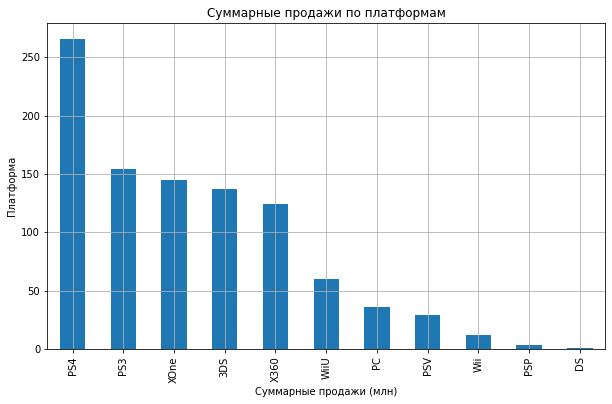

In [18]:
platform_sales_actual = actual_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
platform_sales_actual

# Визуализируем суммарные продажи по платформам
plt.figure(figsize=(10, 6))
platform_sales_actual.plot(
    kind = 'bar', 
    title = 'Суммарные продажи по платформам',
    xlabel = 'Суммарные продажи (млн)',
    ylabel = 'Платформа',
    grid = True
)
plt.show()

Сопоставив текущие объемы продаж с трендами роста и жизненным циклом платформы, я бы рассматривал PS4, XOne и 3DS, как потенциально прибыльные.

### Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

In [19]:
actual_data.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,303.0,0.452046,1.307354,0.01,0.040,0.09,0.2650,13.82
DS,8.0,0.177500,0.158182,0.03,0.060,0.14,0.2300,0.47
PC,189.0,0.192963,0.323022,0.01,0.030,0.07,0.2100,2.82
PS3,345.0,0.448290,1.196301,0.01,0.040,0.14,0.4300,17.09
PS4,392.0,0.678036,1.355221,0.01,0.050,0.17,0.6125,12.25
PSP,67.0,0.051642,0.058558,0.01,0.015,0.02,0.0700,0.24
PSV,358.0,0.083045,0.132121,0.01,0.020,0.04,0.1000,1.72
Wii,23.0,0.545217,0.835093,0.01,0.045,0.17,0.6950,3.27
WiiU,115.0,0.521217,0.965390,0.01,0.060,0.19,0.5450,6.58


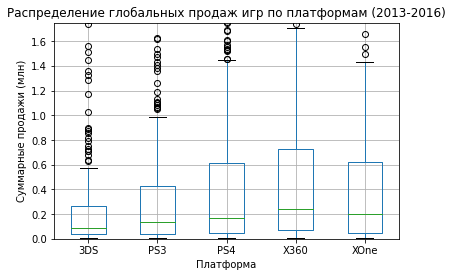

In [21]:
# Определяем топ-5 платформ по суммарным продажам
top_5_platforms = actual_data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(5).index

# Фильтруем данные только для топ-5 платформ
filtered_data = actual_data[actual_data['platform'].isin(top_5_platforms)]

# Построение "ящика с усами" для топ-5 платформ
filtered_data.boxplot(column='total_sales', by='platform')
plt.title('Распределение глобальных продаж игр по платформам (2013-2016)')
plt.suptitle('')
plt.xlabel('Платформа')
plt.ylabel('Суммарные продажи (млн)')
plt.ylim(0, 1.75)  # Ограничиваем выбросы по оси Y
plt.show()

- Как мы видим, на диаграмме размаха много выбросов по каждой платформе. Скорей всего это особо успешные игры, которые сильно выделяются на фоне других по продажам.
- Однако, если мы хотим посмотреть на типичный объем продаж, нам следует обращать внимание на медианные значения. Платформы с высокой медианной более успешны, а именно: 
    - X360 - 0.24 млн. копий
    - XOne - 0.20 млн. копий
    - PS4 - 0.17 млн. копий
    - PS3 - 0.14 млн. копий
    - 3DS - 0.09 млн. копий
    

### Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

В качестве популярной платформы выберем, например PlayStation 4.

Отфльтруем данные для нашей платформы

In [22]:
ps4_data = actual_data.query('platform == "PS4"')
ps4_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
2,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,12.25
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,10.65
9,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,7.30
10,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,6.70
11,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,6.43


Избавимся от пропусков в важных столбцах:

In [23]:
ps4_data = ps4_data.dropna(subset=['critic_score', 'user_score', 'total_sales'])
ps4_data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
4,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,10.65
9,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,7.30
11,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,6.43
12,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,6.49
15,Fallout 4,PS4,2015,Role-Playing,2.53,3.27,0.24,1.13,87.0,6.5,M,6.04


Теперь построим диаграммы с оценками критиков и игроков:

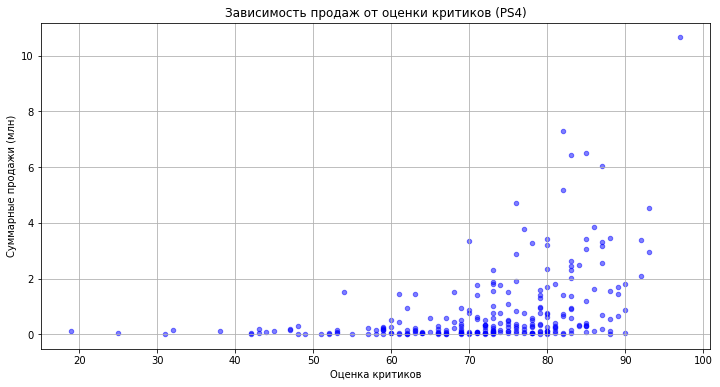

Корреляция между оценками критиков и продажами: 0.405325399594284


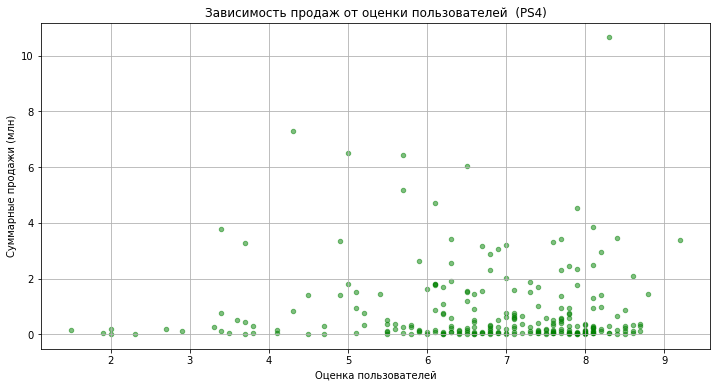

Корреляция между оценками пользователей и продажами: -0.028159260630114112


In [24]:
# Диаграмма рассеяния для оценки критиков и продаж
#plt.subplot(1,2,1)
ps4_data.plot(
    kind = 'scatter',
    x = 'critic_score',
    xlabel = 'Оценка критиков',
    y = 'total_sales',
    ylabel = 'Суммарные продажи (млн)',
    alpha = 0.5,
    title = 'Зависимость продаж от оценки критиков (PS4)',
    grid = True,
    color = 'blue',
    figsize=(12, 6)    
)
plt.show()

# Рассчитаем корреляцию
critic_corr = ps4_data['critic_score'].corr(ps4_data['total_sales'])
print('Корреляция между оценками критиков и продажами:', critic_corr)

# Диаграмма рассеяния для оценки пользователей и продаж
#plt.subplot(1,2,2)
ps4_data.plot(
    kind = 'scatter',
    x = 'user_score',
    xlabel = 'Оценка пользователей',
    y = 'total_sales',
    ylabel = 'Суммарные продажи (млн)',
    alpha = 0.5,
    title = 'Зависимость продаж от оценки пользователей  (PS4)',
    grid = True,
    color = 'green',
    figsize=(12, 6)
)
plt.show()

# Рассчитаем корреляцию
user_corr = ps4_data['user_score'].corr(ps4_data['total_sales'])
print('Корреляция между оценками пользователей и продажами:', user_corr)

Исходя из представленного выше, можем судить о том, что оценки критиков имеют некоторое влияние на продажи, в то время, как оценки пользователей совсем на них не влияют, по крайней мере на платформе PS4 в период 2013-2016.

##### Соотнесем выводы с продажами игр на других платформах.

Построим корреляции для других популярных платформ. Для этого смастерим функцию.

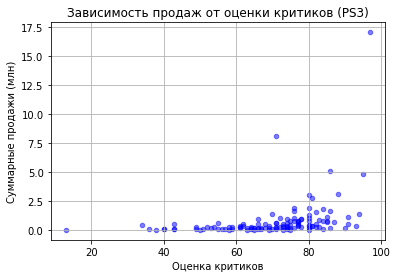

Корреляция: 0.3375139894933373


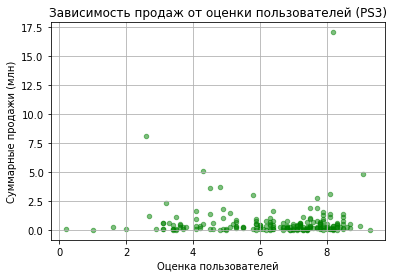

Корреляция: -0.005167775353059386


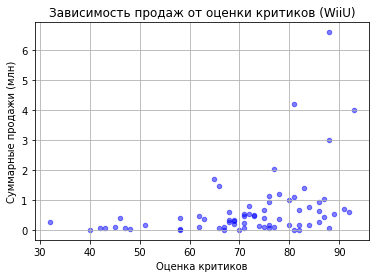

Корреляция: 0.3745905320498915


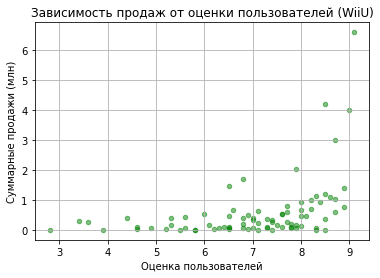

Корреляция: 0.4161681276062978


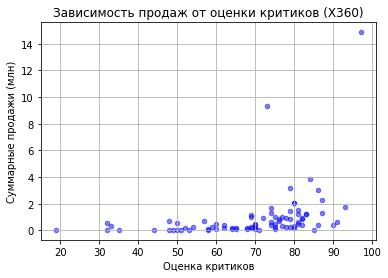

Корреляция: 0.3504305787216835


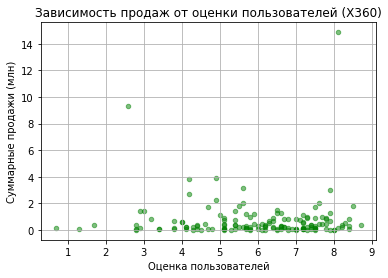

Корреляция: -0.009245415670703395


In [25]:
# Функция для расчета корреляции и построения графиков для указанной платформы
def analyze_platform(data, platform_name):
    platform_data = data[(data['platform'] == platform_name)]
           
    # Диаграмма рассеяния для оценки критиков и продаж
    platform_data.plot(
        kind = 'scatter',
        x = 'critic_score',
        xlabel = 'Оценка критиков',
        y = 'total_sales',
        ylabel = 'Суммарные продажи (млн)',
        alpha = 0.5,
        title = f'Зависимость продаж от оценки критиков ({platform_name})',
        grid = True,
        color = 'blue'
    )
    plt.show()
    
    # Диаграмма рассеяния для оценки пользователей и продаж
    critic_corr = platform_data['critic_score'].corr(platform_data['total_sales'])
    print('Корреляция:', critic_corr)
    
    platform_data.plot(
        kind = 'scatter',
        x = 'user_score',
        xlabel = 'Оценка пользователей',
        y = 'total_sales',
        ylabel = 'Суммарные продажи (млн)',
        alpha = 0.5,
        title = f'Зависимость продаж от оценки пользователей ({platform_name})',
        grid = True,
        color = 'green'
    )
    plt.show()
    
    # Рассчитываем корреляцию
    user_corr = platform_data['user_score'].corr(platform_data['total_sales'])
    print('Корреляция:', user_corr)

    return critic_corr, user_corr

# Проведем анализ для PS3
critic_corr_ps3, user_corr_ps3 = analyze_platform(actual_data, 'PS3')

# Проведем анализ для Wii U
critic_corr_wiiu, user_corr_wiiu = analyze_platform(actual_data, 'WiiU')

# Проведем анализ для Xbox 360
critic_corr_x360, user_corr_x360 = analyze_platform(actual_data, 'X360')

- Оценки критиков оказывают умеренное влияние на продажи на всех платформах.
- Оценки пользователей варьируются в значимости от платформы к платформе, с наибольшей важностью на "WiiU", где корреляция оказалась самой высокой, по сравнению с другими платформами.

### Посмотрим на общее распределение игр по жанрам. 

Расчитаем суммарные продажи для каждого жанра и построим график:

genre
Action          284.67
Shooter         204.21
Role-Playing    134.41
Sports          131.20
Misc             56.73
Platform         38.51
Racing           35.45
Fighting         31.75
Adventure        21.21
Simulation       20.30
Strategy          9.27
Puzzle            3.01
Name: total_sales, dtype: float64


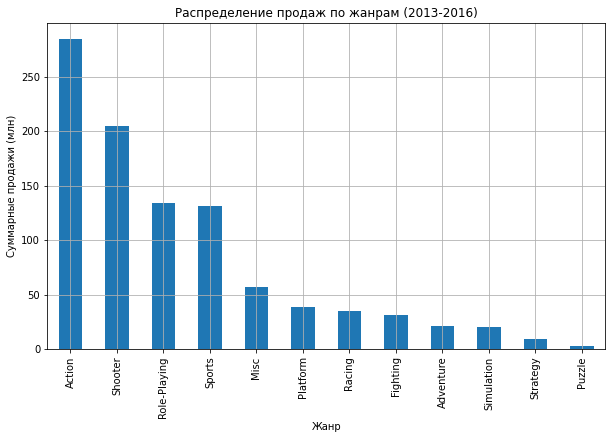

In [26]:
genre_sales = actual_data.groupby('genre')['total_sales'].sum().sort_values(ascending=False)
print(genre_sales)

genre_sales.plot(
    kind = 'bar',
    title = 'Распределение продаж по жанрам (2013-2016)',
    xlabel = 'Жанр',
    ylabel = 'Суммарные продажи (млн)',
    grid = True,
    figsize = (10,6)
)
plt.show()

Видно, что "Action" является самым прибыльным жанром, с суммарными продажами 810 млн. копий. Жанры "Shooter" и "Sports" входят в топ-3 с продажами 549 и 465 млн. копий соответственно.
Самые низкие продажи у жанров "Puzzle" и "Strategy", и неудивительно, это довольно нишевые игры, и направлены на узкую целевую аудиторию. Разрыв между самымы прибыльными и неприбыльными жанрами огромен — 300-700 млн. копий.

Высокие продажи могут быть вызваны не успехом, а просто огромным количеством игр. Вполне могут быть жанры, где игр немного, но при этом продажи сопоставимы с продажами Экшена. Чтобы проверить это, стоит рассмотреть средние или медианные продажи.

genre
Shooter         0.410
Sports          0.205
Platform        0.190
Role-Playing    0.120
Fighting        0.115
Action          0.100
Racing          0.100
Simulation      0.095
Misc            0.090
Strategy        0.070
Puzzle          0.060
Adventure       0.030
Name: total_sales, dtype: float64


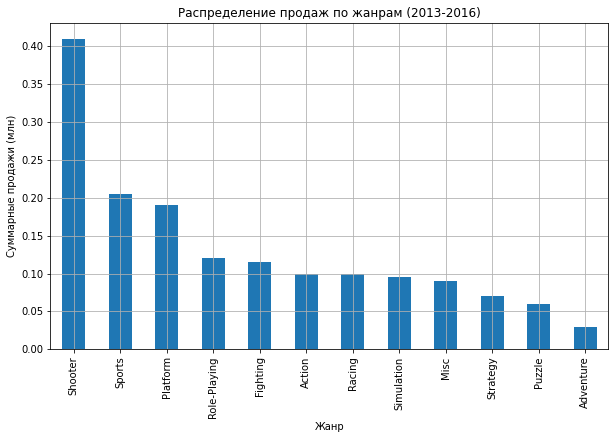

In [27]:
genre_median_sales = actual_data.groupby('genre')['total_sales'].median().sort_values(ascending=False)
print(genre_median_sales)

genre_median_sales.plot(
    kind = 'bar',
    title = 'Распределение продаж по жанрам (2013-2016)',
    xlabel = 'Жанр',
    ylabel = 'Суммарные продажи (млн)',
    grid = True,
    figsize = (10,6)
)
plt.show()

<p>В таком случае, у нас сильно меняется картина! Action ушел аж на 6-ю позицию! А Platform вышел на 3-ю!</p>
<p>Самым успешным жанром стал Shooter. Он сильно отрывается по продажам от своих соседей, достигая отметки в 400 тыс. продаваемых копий. Что примерно составляет продажи спортивнвых игр и платформеров вместе вхятых!</p>
<p>Конец графика тоже изменился, его закрывают Strategy, Puzzle и Adventure.

<b>Промежуточный итог:</b>
<p>В последние годы (2013-2016) количество выпущенных игр немного снизилось по сравнению с предыдущим пиком, что может указывать на насыщение рынка или сужение ассортимента выпускаемых игр. Тем не менее, этот период все еще отражает современные тенденции на рынке видеоигр.</p>
<p>Платформы с наибольшими продажами, такие как PlayStation 4, Xbox One, продемонстрировали устойчивый рост и лидируют по суммарным продажам в последние годы. В то же время, такие платформы как Wii и Nintendo DS начали терять популярность.
PS4 и XOne, имеют высокий потенциал для дальнейшего роста, т.к. находятся в начале или середине своего жизненного цикла.</p>
<p>Жанры Action, Shooter, и Sports занимают лидирующие позиции по суммарным продажам, что делает их основными категориями для дальнейшего маркетингового анализа.
Жанры Puzzle и Strategy показали низкие продажи, что указывает на более узкую аудиторию или ограниченный спрос на эти типы игр.
</p>
<p>Оценки критиков оказывают умеренное влияние на продажи игр на платформах PlayStation 4 и Xbox One, что подтверждает их значимость при продвижении игр.
Оценки пользователей, напротив, имеют слабое влияние на продажи, особенно на PlayStation 4 и Xbox One, что указывает на меньшую роль пользовательских оценок в решении о покупке.</p>


## Шаг 4. Составим портрет пользователя каждого региона

### Определим для пользователя каждого региона (NA, EU, JP):

#### Самые популярные платформы (топ-5). Опишем различия в долях продаж.

Чтобы определить самые популярные платформы и жанры для каждого региона, создадим функцию

Топ платформ Сев. Америки 
 platform
PS4     108.74
XOne     93.12
X360     81.66
PS3      63.50
3DS      38.20
Name: na_sales, dtype: float64 

Топ платформ Европы 
 platform
PS4     141.09
PS3      67.81
XOne     51.59
X360     42.52
3DS      30.96
Name: eu_sales, dtype: float64 

Топ платформ Японии 
 platform
3DS     67.81
PS3     23.35
PSV     18.59
PS4     15.96
WiiU    10.88
Name: jp_sales, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

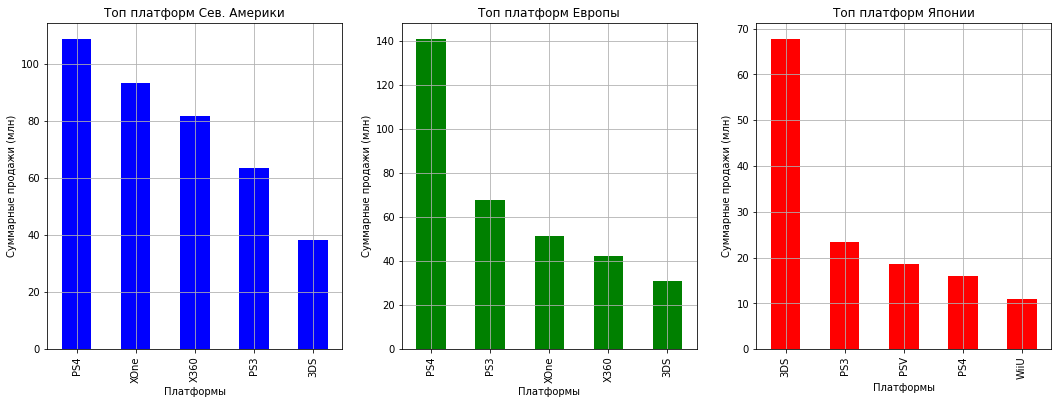

In [33]:
# Будем работать с топ-5
def top_platforms(data, region_sales):
    top_platforms = data.groupby('platform')[region_sales].sum().sort_values(ascending=False).head(5)
    
    return top_platforms

top_platforms_na = top_platforms(actual_data, 'na_sales')
print('Топ платформ Сев. Америки \n',top_platforms_na, '\n')

top_platforms_eu = top_platforms(actual_data, 'eu_sales')
print('Топ платформ Европы \n', top_platforms_eu, '\n')

top_platforms_jp = top_platforms(actual_data, 'jp_sales')
print('Топ платформ Японии \n', top_platforms_jp)

# Построим графики
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
top_platforms_na.plot(
    kind = 'bar', 
    title = 'Топ платформ Сев. Америки',
    xlabel = 'Платформы',
    ylabel = 'Суммарные продажи (млн)',
    color = 'blue',
    grid = True
)

plt.subplot(1, 3, 2)
top_platforms_eu.plot(
    kind = 'bar', 
    title = 'Топ платформ Европы',
    xlabel = 'Платформы',
    ylabel = 'Суммарные продажи (млн)',
    color = 'green',
    grid = True
)

plt.subplot(1, 3, 3)
top_platforms_jp.plot(
    kind = 'bar', 
    title = 'Топ платформ Японии',
    xlabel = 'Платформы',
    ylabel = 'Суммарные продажи (млн)',
    color = 'red',
    grid = True
)

plt.show

<b>Как видим, результаты сильно отличаются, что свидетельствует, что в данных регионах есть свои особенности и предпочтения.</b>
- в Сев. Америке лидирует PS4, не сильно отстает XOne. Видно, что в Америке больше, чем в Европе популярны Xbox.
- в Европе также лидерует платформа PS4. Но в Европе, в отличии от Америки более популярны платформы фирмы Sony.
- в Японии продажи еще ниже, чем в Европе. Можно заметить, что японцы предпочитают мобильность судя по тому, что в лидерах оказалась Nintendo 3DS. Так же стоит отметить, что в топе только отечественные платформы.

#### Самые популярные жанры (топ-5). Поясним разницу.

Топ жанры в Сев. Америке 
 genre
Action          126.05
Shooter         109.74
Sports           65.27
Role-Playing     46.40
Misc             27.49
Name: na_sales, dtype: float64 

Топ жанры в Европе 
 genre
Action          118.13
Shooter          87.86
Sports           60.52
Role-Playing     36.97
Racing           20.19
Name: eu_sales, dtype: float64 

Топ жанры в Японии 
 genre
Role-Playing    51.04
Action          40.49
Misc             9.20
Fighting         7.65
Shooter          6.61
Name: jp_sales, dtype: float64


<function matplotlib.pyplot.show(close=None, block=None)>

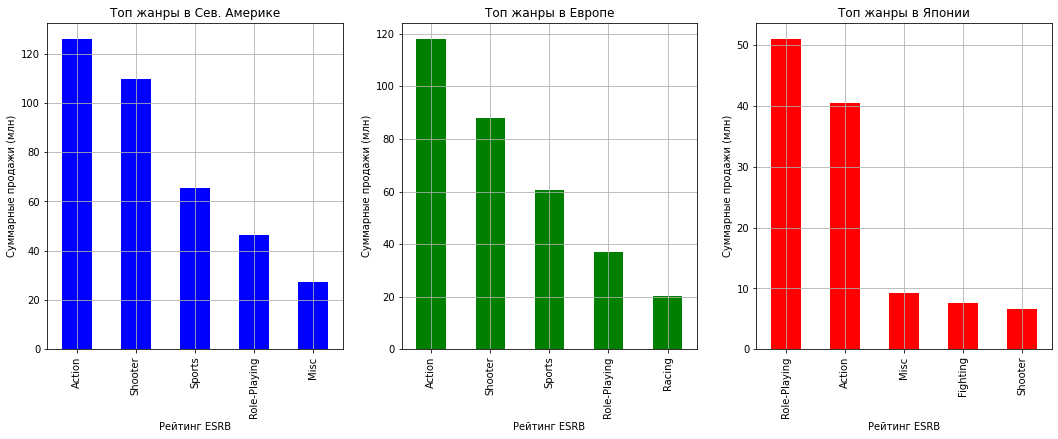

In [29]:
def top_genres(data, region_sales):
    top_genres = data.groupby('genre')[region_sales].sum().sort_values(ascending=False).head(5)
    
    return top_genres

top_genres_na = top_genres(actual_data, 'na_sales')
print('Топ жанры в Сев. Америке \n', top_genres_na, '\n')

top_genres_eu = top_genres(actual_data, 'eu_sales')
print('Топ жанры в Европе \n', top_genres_eu, '\n')

top_genres_jp = top_genres(actual_data, 'jp_sales')
print('Топ жанры в Японии \n', top_genres_jp)

# Построим графики
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
top_genres_na.plot(
    kind = 'bar', 
    title = 'Топ жанры в Сев. Америке',
    xlabel = 'Рейтинг ESRB',
    ylabel = 'Суммарные продажи (млн)',
    color = 'blue',
    grid = True
)

plt.subplot(1, 3, 2)
top_genres_eu.plot(
    kind = 'bar', 
    title = 'Топ жанры в Европе',
    xlabel = 'Рейтинг ESRB',
    ylabel = 'Суммарные продажи (млн)',
    color = 'green',
    grid = True
)

plt.subplot(1, 3, 3)
top_genres_jp.plot(
    kind = 'bar', 
    title = 'Топ жанры в Японии',
    xlabel = 'Рейтинг ESRB',
    ylabel = 'Суммарные продажи (млн)',
    color = 'red',
    grid = True
)

plt.show

<b>Америка и Европа очень близки по духу — в обоих регионах лидирующее место занимает "Action", тогда как в Японии "Role-Playing" сильно опережает все остальные жанры (кроме экшена), что подчеркивает традиционную популярность ролевых игр в Японии.

#### Влияет ли рейтинг ESRB на продажи в отдельном регионе?

Чтобы проанализировать влияние рейтинга ESRB на продажи в регионе создадим функцию.

Влияние рейтинга ESRB для Сев. Америки 
 rating
M       165.21
E        79.05
E10+     54.24
T        49.79
Name: na_sales, dtype: float64 

Влияние рейтинга ESRB для Европы 
 rating
M       165.21
E        79.05
E10+     54.24
T        49.79
Name: na_sales, dtype: float64 

Влияние рейтинга ESRB для Японии 
 rating
M       165.21
E        79.05
E10+     54.24
T        49.79
Name: na_sales, dtype: float64 



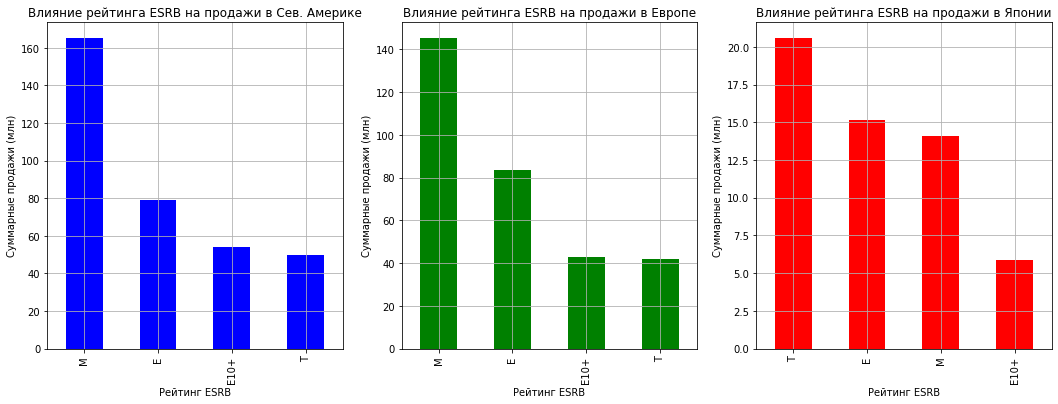

In [30]:
def esrb_sales(data, region_sales):
    esrb_sales = data.groupby('rating')[region_sales].sum().sort_values(ascending=False)
    return esrb_sales

esrb_sales_na = esrb_sales(actual_data, 'na_sales')
print('Влияние рейтинга ESRB для Сев. Америки \n', esrb_sales_na, '\n')

esrb_sales_eu = esrb_sales(actual_data, 'eu_sales')
print('Влияние рейтинга ESRB для Европы \n', esrb_sales_na, '\n')

esrb_sales_jp = esrb_sales(actual_data, 'jp_sales')
print('Влияние рейтинга ESRB для Японии \n', esrb_sales_na, '\n')

# Построим графики влияния рейтинга ESRB на продажи в каждом регионе
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
esrb_sales_na.plot(
    kind = 'bar', 
    title = 'Влияние рейтинга ESRB на продажи в Сев. Америке',
    xlabel = 'Рейтинг ESRB',
    ylabel = 'Суммарные продажи (млн)',
    color = 'blue',
    grid = True
)

plt.subplot(1, 3, 2)
esrb_sales_eu.plot(
    kind = 'bar', 
    title = 'Влияние рейтинга ESRB на продажи в Европе',
    xlabel = 'Рейтинг ESRB',
    ylabel = 'Суммарные продажи (млн)',
    color = 'green',
    grid = True
)

plt.subplot(1, 3, 3)
esrb_sales_jp.plot(
    kind = 'bar', 
    title = 'Влияние рейтинга ESRB на продажи в Японии',
    xlabel = 'Рейтинг ESRB',
    ylabel = 'Суммарные продажи (млн)',
    color = 'red',
    grid = True
)

plt.show()

<p>Америка и Европа опять близки по духу — доминирует рейтинг "M" (mature), и немного отставая, следом идет рейтинг "E" (everyone).  Это подтверждает сильный спрос на экшен и спортивные игры, который мы наблюдали ранее.
В Японии же ситуация другая — преобладают игры с рейтингом "T" (teen), что указывает на аудиторию подростков. Примечательно, что игры с рейтингом "М" лишь на 3-й позиции.</p> 
<p>Рейтинг ESRB оказывает значительное влияние на продажи игр в разных регионах, и это влияние различается в зависимости от культурных предпочтений и демографии игроков.</p>

<b>Промежуточный итог:</b>
<p>С помощью анализа мы смогли сформировать портрет пользователей в разных регионах. В Северной Америке и Европе доминируют взрослые и семейные игры на консолях PlayStation и Xbox, тогда как в Японии предпочтение отдается портативным устройствам и ролевым играм. Рейтинг ESRB играет важную роль в выборе игр пользователями, и его влияние значительно варьируется в зависимости от региона.</p> 

## Шаг 5. Проверим гипотезы

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Сформируем нулевыую  и альтернативную гипотезы:
- <b>Нулевая гипотеза:</b> Средние пользовательские рейтинги платформ Xbox One и PC равны.
- <b>Альтернативная гипотеза:</b> Средние пользовательские рейтинги на платформах Xbox One и PC различаются.

Будем проверять двустороннюю гипотезу

In [31]:
# Фильтрация данных для платформ Xbox One и PC
xone_data = actual_data.query('platform == "XOne"')
pc_data = actual_data.query('platform == "PC"')

# Уберем пропуски, т.к. с ними выдает ошибку
xone_user_scores = xone_data['user_score'].dropna()
pc_user_scores = pc_data['user_score'].dropna()

alpha = 0.05 # назначим уровень стат. значимости

result = st.ttest_ind(xone_user_scores, pc_user_scores, equal_var=False) # будем проверять неравность
print('pvalue:', result.pvalue)

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

pvalue: 0.16097023533449153
Не получилось отвергнуть нулевую гипотезу


Выходит, что средние пользовательские рейтинги на платформах Xbox One и PC не имеют статистически значимых различий. Средние оценки пользователей на этих платформах можно считать примерно равными.

### Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Сформируем нулевую  и альтернативную гипотезы:
- <b>Нулевая гипотеза:</b> Средние пользовательские рейтинги жанров Action и Sports одинаковые.
- <b>Альтернативная гипотеза:</b> Средние пользовательские рейтинги жанров Action и Sports различаются.

In [32]:
# Фильтрация данных для жанров Action и Sports
action_data = actual_data.query('genre == "Action"')
sports_data = actual_data.query('genre == "Sports"')

# Уберем пропуски, т.к. с ними выдает ошибку
action_user_scores = action_data['user_score'].dropna()
sports_user_scores = action_data['user_score'].dropna()

alpha = 0.05 # назначим уровень стат. значимости

result = st.ttest_ind(action_user_scores, sports_user_scores, equal_var=False) # будем проверять неравность
print("p-value:", result.pvalue)

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: 1.0
Не получилось отвергнуть нулевую гипотезу


Таким образом, мы не обнаружили доказательств того, что оценки пользователей различаются между этими жанрами.

<b>Промежуточный итог:</b>
<p>Средние пользовательские оценки для платформ Xbox One и PC являются примерно одинаковыми, что может свидетельствовать о сходстве игр, представленных на этих платформах, или о схожих предпочтениях их пользователей.</p>
<p>Средние пользовательские оценки для жанров Action и Sports также не различаются, что указывает на равное восприятие этих жанров игроками.</p>
<p>Эти результаты могут указывать на то, что пользовательские оценки, в рассматриваемых случаях, являются достаточно стабильными и не зависят от конкретной платформы или жанра.</p>
<p>В обоих случаях мы воспользовались двухвыборочным t-тестом для независимых выборок. Он является подходящим инструментом для сравнения средних значений двух групп, особенно когда нет строгого предположения о равенстве дисперсий. Этот критерий позволил нам объективно оценить, существуют ли статистически значимые различия в средних пользовательских рейтингах между платформами и жанрами.</p>

# Общий вывод

1. Исследовательский анализ данных.
- Изменение продаж по платформам: Лидирующие платформы, такие как PlayStation 4, Xbox One, и PlayStation 3, демонстрируют стабильные продажи, в то время как платформы, такие как Wii и Nintendo DS, теряют популярность. Платформы, находящиеся на пике жизненного цикла, показывают наибольший потенциал для дальнейшего роста.
- Жанры с наибольшими продажами: Жанры Shooter, Sports и Platform занимают лидирующие позиции по суммарным медианным продажам, что свидетельствует о высоком спросе на динамичные и спортивные игры. Жанры Adventure, Puzzle и Strategy показали низкие продажи, что указывает на более узкую аудиторию.
- Влияние оценок на продажи: Оценки критиков оказывают умеренное влияние на продажи игр, в то время как оценки пользователей показали слабое влияние. Это может говорить о важности профессиональной критики при продвижении игр на рынке. Интересно отметить,что данная тенденция не работает с платформой WiiU.

2. Составление портрета пользователя каждого региона.
- Северная Америка: Платформы PS4, Xbox One, а так же жанры Action и Shooter занимают лидирующие позиции. Игры с рейтингом "M" (mature) и "E" (everyone) наиболее популярны, что указывает на широкий спектр целевой аудитории.
- Европа: PlayStation 4 и жанры Action и Shooter лидируют. Рейтинг "M" также занимает первое место по продажам, что подчеркивает популярность взрослого контента.
- Япония: Портативные платформы, такие как Nintendo 3DS, доминируют, а жанр Role-Playing (RPG) значительно превосходит другие жанры по продажам. Игры с рейтингом "Т" являются самыми продаваемыми, что отражает значительное количество игр, ориентированных на подростковую аудиторию.

3. Проверка гипотез.
- Гипотеза 1 (Средние пользовательские рейтинги платформ Xbox One и PC одинаковые): Не было обнаружено статистически значимых различий в средних пользовательских рейтингах между платформами, что может свидетельствовать о схожести предпочтений пользователей на этих платформах.
- Гипотеза 2 (Средние пользовательские рейтинги жанров Action и Sports разные): Также не было обнаружено значимых различий между средними пользовательскими рейтингами жанров, что указывает на равное восприятие этих жанров среди пользователей.

Проект позволил выявить ключевые факторы, влияющие на успех видеоигр в разных регионах и на разных платформах. Полученные данные подчеркивают важность платформ на пике жизненного цикла, жанров с высоким спросом и значимость профессиональных оценок критиков. Результаты анализа могут быть использованы для прогнозирования продаж и планирования маркетинговых кампаний, ориентированных на конкретные регионы и платформы.